In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(2)

In [3]:
df = pd.read_csv("fastext_model_300.csv").drop('Unnamed: 0', axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.019725,0.007517,0.031000,-0.019279,0.015091,0.039039,-0.002467,0.028515,0.017816,0.059022,...,-0.026541,0.000214,-0.000132,-0.012686,-0.007418,0.006001,0.039460,0.011033,0.006645,-0.035628
1,0.019251,0.008301,0.031346,-0.020279,0.015921,0.039229,-0.003979,0.027616,0.017842,0.059378,...,-0.026816,0.000475,-0.000259,-0.012230,-0.007097,0.005843,0.040605,0.010696,0.007169,-0.035884
2,0.019811,0.008415,0.031064,-0.019168,0.015725,0.039673,-0.003919,0.027507,0.018031,0.059341,...,-0.027172,0.001010,-0.000242,-0.012658,-0.007666,0.005575,0.040350,0.010794,0.006779,-0.036183
3,0.018366,0.007835,0.031439,-0.020077,0.014776,0.037820,-0.003977,0.027423,0.018758,0.059059,...,-0.026209,0.000335,-0.000960,-0.011839,-0.007165,0.006349,0.039941,0.010773,0.007891,-0.035474
4,0.019520,0.007250,0.030408,-0.019623,0.015322,0.039419,-0.003180,0.027846,0.018707,0.058581,...,-0.027376,0.000380,0.000157,-0.012741,-0.007069,0.005836,0.040805,0.010732,0.006539,-0.035790


In [4]:
for n_comp in [10,20,30,40,50]:
    model_pca = PCA(n_components=n_comp)
    data_pca = model_pca.fit_transform(df)
    print(f"# componentes {n_comp}\t{sum(model_pca.explained_variance_ratio_)}")

# componentes 10	0.9481256998633257
# componentes 20	0.9969731205262029
# componentes 30	0.9999994566007764
# componentes 40	0.9999999975207875
# componentes 50	0.9999999989165096


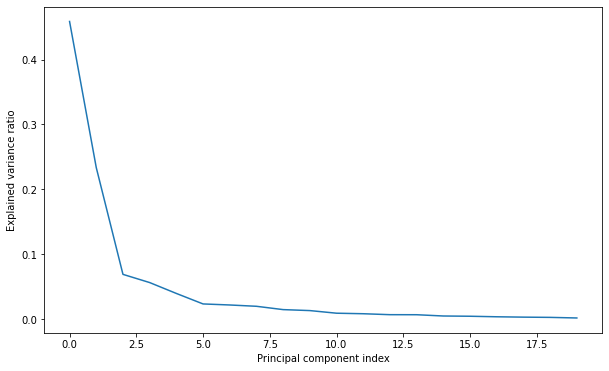

In [6]:
model_pca = PCA(n_components=20)
data_pca = model_pca.fit_transform(df)

plt.figure(figsize=(10,6))
plt.plot(model_pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [18]:
model_pca = PCA(n_components=5)
data_pca = model_pca.fit_transform(df)
sum(model_pca.explained_variance_ratio_)

0.8565722405529366

In [19]:
data_tsne_list = []
for perp in range(5, 55, 5):
    model_tsne = TSNE(random_state=0, verbose=0, perplexity=perp)
    data_tsne = model_tsne.fit_transform(data_pca)
    data_tsne_list.append({"perp": perp, "tsne": data_tsne})

len(data_tsne_list)

10

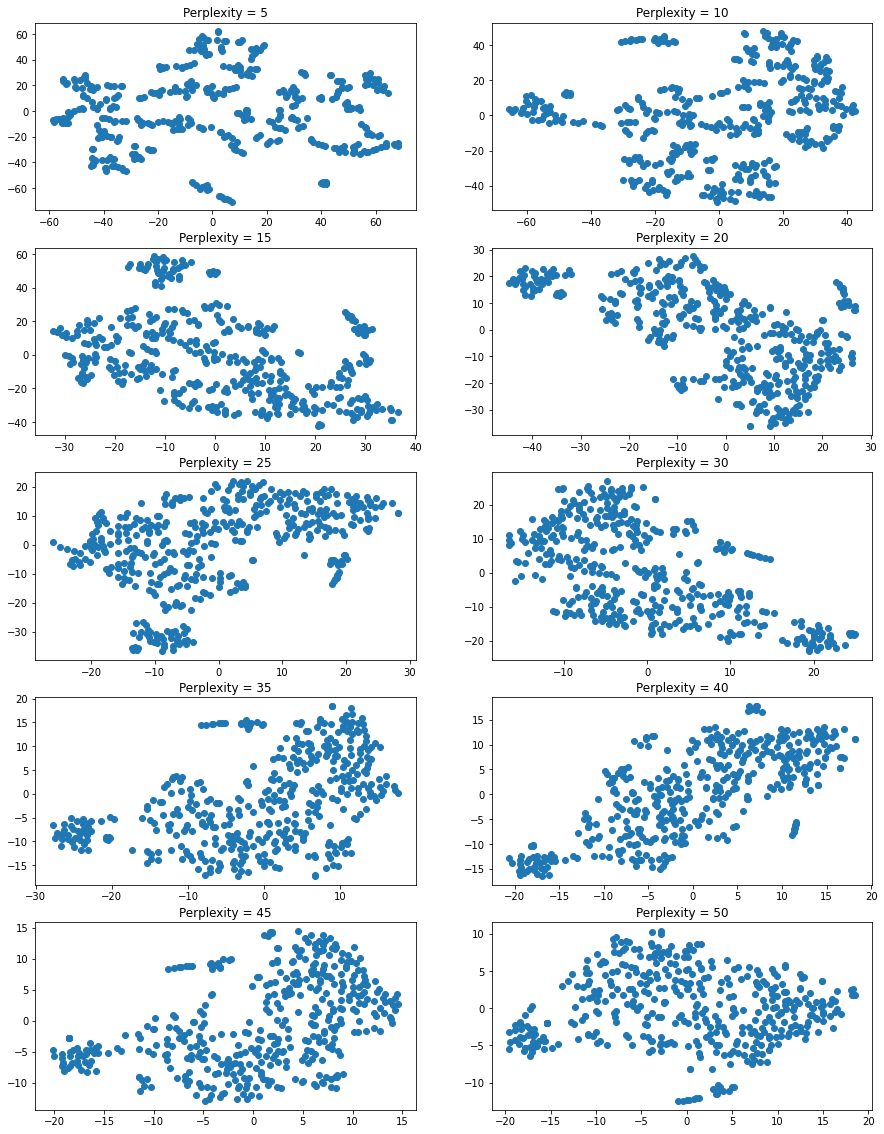

In [20]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
idx = 0
for i in range(0,5):
    for j in range(0,2):
        data = data_tsne_list[idx]; idx+=1
        axs[i, j].scatter(data["tsne"][:,0], data["tsne"][:,1])
        axs[i, j].set_title(f'Perplexity = {data["perp"]}')

# PCA Clustering

In [21]:
X = pd.DataFrame(data_pca)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       421 non-null    float64
 1   1       421 non-null    float64
 2   2       421 non-null    float64
 3   3       421 non-null    float64
 4   4       421 non-null    float64
dtypes: float64(5)
memory usage: 16.6 KB


In [22]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,0.000000e+00,0.020136,-0.016114,-0.010734,-6.890694e-03,0.000116,0.165819
1,421.0,-3.564218e-19,0.014364,-0.038864,-0.004616,1.203264e-03,0.003906,0.206572
2,421.0,-2.414603e-18,0.007796,-0.026068,-0.004831,1.175650e-03,0.004862,0.027424
3,421.0,8.673617e-19,0.007043,-0.027165,-0.003333,-6.904973e-07,0.003363,0.028408
4,421.0,-1.410235e-18,0.005896,-0.028857,-0.002601,-1.367249e-04,0.001972,0.033780


In [23]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

Text(0, 0.5, 'Squere sum of cluster')

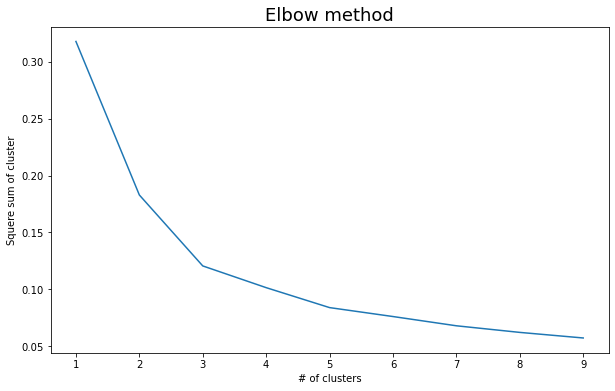

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

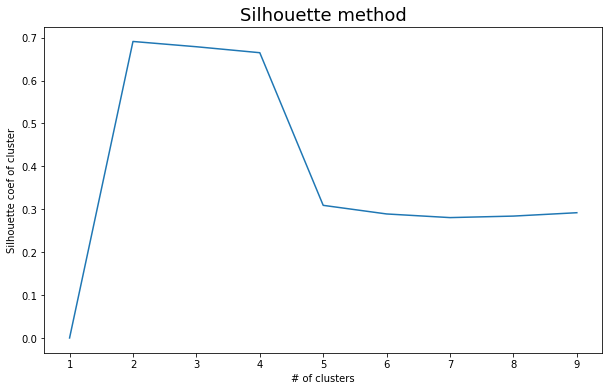

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')

# T-SNE Clustering

In [26]:
model_tsne = TSNE(random_state=0, verbose=0, perplexity=10)
data_tsne = model_tsne.fit_transform(data_pca)
X_tsne = pd.DataFrame(data_tsne)
X_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       421 non-null    float32
 1   1       421 non-null    float32
dtypes: float32(2)
memory usage: 3.4 KB


In [27]:
X_tsne.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,-1.168334,26.535725,-65.550682,-18.783213,4.601604,19.968010,42.372314
1,421.0,-1.214458,25.338564,-48.965328,-20.217497,0.451462,14.961497,47.918255


Text(0, 0.5, 'Squere sum of cluster')

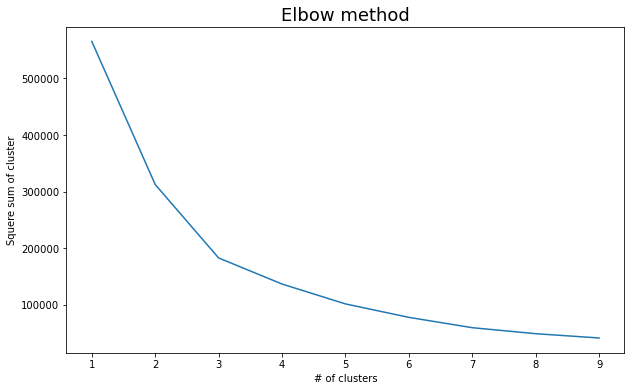

In [28]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X_tsne)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X_tsne, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

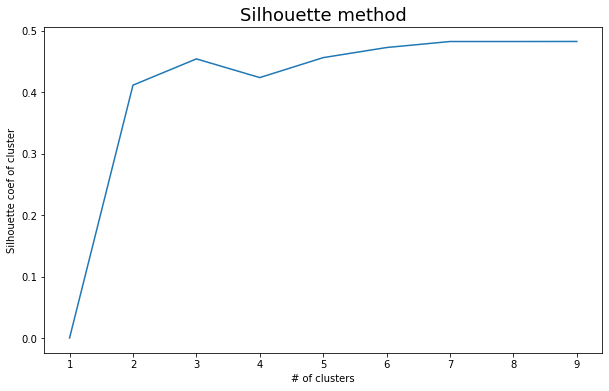

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')